In [ ]:
import numpy as np
import matplotlib.pyplot as plt

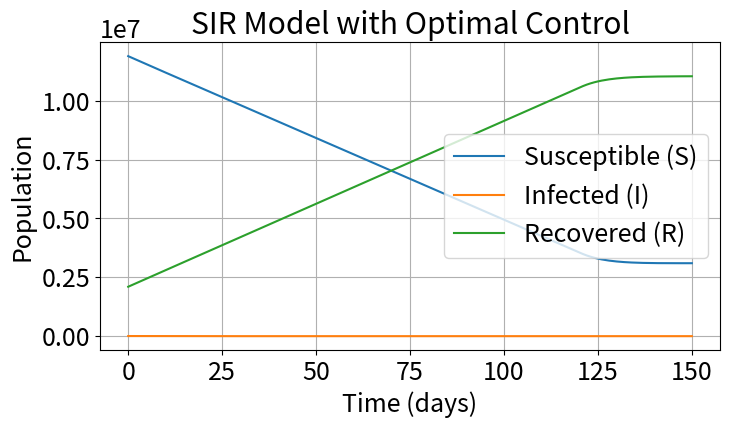

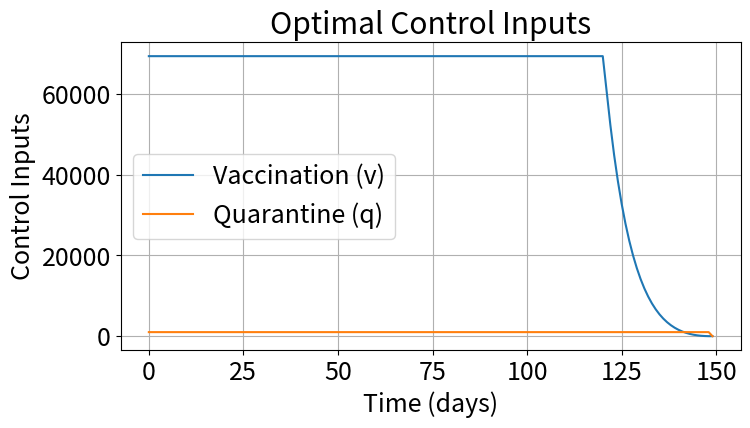

In [53]:


# パラメータ設定
T = 150  # 時間ステップ
dt = 1  # 時間刻み

N = 1.4 * 10**7    # 全人口
I0 = 5288            # 初期感染者数
R0= N * 0.15             # 初期回復者数
S0 = N - I0 - R0   # 初期の感受性者数

gamma = 0.1        # 回復率
r0 = 2.28        # 基本再生産数
beta = r0 * gamma / S0  # 伝染率

V_max = 6.94 * 10**4  # ワクチン最大接種量　期間中の一日あたりのワクチン接種数が62.5万人．東京はその約1/10．それの2
Q_max = 1000  # 隔離最大量


# 重みパラメータ
mu_I = 1  # 感染者数のコスト
mu_v = 1  # ワクチンコスト
mu_q = 1  # 隔離コスト
mu_S = 0.01  # 感受性者数のコスト
mu_R = 0.1  # 回復者数のコスト


# 初期化
S = np.zeros(T + 1)
I = np.zeros(T + 1)
R = np.zeros(T + 1)
v = np.zeros(T)
q = np.zeros(T)

lambda_S = np.zeros(T + 1)
lambda_I = np.zeros(T + 1)
lambda_R = np.zeros(T + 1)

# 初期状態と終端条件
S[0], I[0], R[0] = S0, I0, R0

# 終端条件
lambda_S[-1], lambda_I[-1], lambda_R[-1] = -mu_S, 2 * mu_I * I[-1], -mu_R

# 反復計算
epsilon = 1e-3  # 収束条件
max_iter = 100  # 最大反復回数
for iteration in range(max_iter):
    # 逆向きに共役変数を更新
    for t in reversed(range(T)):
        # 共役変数の更新
        lambda_S[t] = lambda_S[t + 1] - mu_S + beta * I[t] * (lambda_I[t + 1] - lambda_S[t + 1])
        lambda_I[t] = lambda_I[t + 1] + 2 * mu_I * I[t] + beta * S[t] * (lambda_I[t + 1] - lambda_S[t + 1]) + gamma * (lambda_R[t + 1] - lambda_I[t + 1])
        lambda_R[t] = lambda_R[t + 1] - mu_R
        

    # 順方向に状態を更新
    prev_v = v.copy()
    prev_q = q.copy()
    for t in range(T):
        # 最適制御入力の計算
        v[t] = np.clip((lambda_S[t + 1] - lambda_R[t + 1]) / (2 * mu_v), 0, V_max)
        q[t] = np.clip((lambda_I[t + 1] - lambda_R[t + 1]) / (2 * mu_q), 0, Q_max)

        # 状態遷移
        S[t + 1] = max(0, S[t] - beta * S[t] * I[t] - v[t])
        I[t + 1] = max(0, I[t] + beta * S[t] * I[t] - gamma * I[t] - q[t])
        R[t + 1] = max(0, R[t] + gamma * I[t] + v[t] + q[t])

    # 収束判定
    if np.max(np.abs(v - prev_v)) < epsilon and np.max(np.abs(q - prev_q)) < epsilon:
        break

# 結果のプロット
time = np.arange(T + 1)

plt.figure(figsize=(8, 4))
plt.plot(time, S, label='Susceptible (S)')
plt.plot(time, I, label='Infected (I)')
plt.plot(time, R, label='Recovered (R)')
plt.xlabel('Time (days)')
plt.ylabel('Population')
plt.title('SIR Model with Optimal Control')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 4))
plt.plot(np.arange(T), v, label='Vaccination (v)')
plt.plot(np.arange(T), q, label='Quarantine (q)')
plt.xlabel('Time (days)')
plt.ylabel('Control Inputs')
plt.title('Optimal Control Inputs')
plt.legend()
plt.grid(True)
plt.show()

In [46]:
lambda_S, lambda_I, lambda_R

(array([-5.53092112e+07, -5.53074960e+07, -5.53055602e+07, -5.53033756e+07,
        -5.53009099e+07, -5.52981268e+07, -5.52949853e+07, -5.52914391e+07,
        -5.52874356e+07, -5.52829155e+07, -5.52778117e+07, -5.52720481e+07,
        -5.52655387e+07, -5.52581861e+07, -5.52498796e+07, -5.52404940e+07,
        -5.52298871e+07, -5.52178974e+07, -5.52043414e+07, -5.51890104e+07,
        -5.51716670e+07, -5.51520405e+07, -5.51298223e+07, -5.51046601e+07,
        -5.50761511e+07, -5.50438343e+07, -5.50071815e+07, -5.49655866e+07,
        -5.49183531e+07, -5.48646795e+07, -5.48036427e+07, -5.47341775e+07,
        -5.46550539e+07, -5.45648504e+07, -5.44619226e+07, -5.43443682e+07,
        -5.42099865e+07, -5.40562342e+07, -5.38801760e+07, -5.36784323e+07,
        -5.34471254e+07, -5.31818274e+07, -5.28775130e+07, -5.25285252e+07,
        -5.21285599e+07, -5.16706812e+07, -5.11473771e+07, -5.05506708e+07,
        -4.98722980e+07, -4.91039605e+07, -4.82376626e+07, -4.72661256e+07,
        -4.6